In [97]:
from sklearn import datasets, tree
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
import numpy as np
import pandas as pd
from math import sqrt

In [98]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Data generation

In [99]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [100]:
print X.shape, y.shape

(1797L, 64L) (1797L,)


In [128]:
def write_answer_1(ans):
    with open("answer1.txt", "w") as fout:
        fout.write(str(ans))

def write_answer_2(ans):
    with open("answer2.txt", "w") as fout:
        fout.write(str(ans))
        
def write_answer_3(ans):
    with open("answer3.txt", "w") as fout:
        fout.write(str(ans))
        
def write_answer_4(ans):
    with open("answer4.txt", "w") as fout:
        fout.write(str(ans))
        
def write_answer(features):
    with open("answer.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in features]))

# Make a classifiers and fit it

In [123]:
%%time
estimator_1 = tree.DecisionTreeClassifier()
acc = cross_val_score(estimator_1, X, y, cv=10)
print acc.mean()

0.82919616178
Wall time: 243 ms


In [127]:
write_answer_1(acc.mean())

In [129]:
%%time
estimator_2 = BaggingClassifier(estimator_1, n_estimators=100)
acc = cross_val_score(estimator_2, X, y, cv=10)
print acc.mean()

0.922677070645
Wall time: 14.7 s


In [130]:
write_answer_2(acc.mean())

In [131]:
%%time
estimator_3 = BaggingClassifier(estimator_1, n_estimators=100, max_features=int(X.shape[1]**0.5))
acc = cross_val_score(estimator_3, X, y, cv=10)
print acc.mean()

0.925477407362
Wall time: 4.24 s


In [132]:
write_answer_3(acc.mean())

In [133]:
%%time
estimator_4 = RandomForestClassifier(n_estimators=100)
acc = cross_val_score(estimator_4, X, y, cv=10)
print acc.mean()

0.95005698885
Wall time: 4.11 s


In [134]:
write_answer_4(acc.mean())

In [135]:
%%time
n_estimators = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
n_accurasy = []

for i in n_estimators:
    estimator_4 = RandomForestClassifier(n_estimators=i)
    acc = cross_val_score(estimator_4, X, y, cv=10)
    n_accurasy.append(acc.mean())

Wall time: 1min 23s


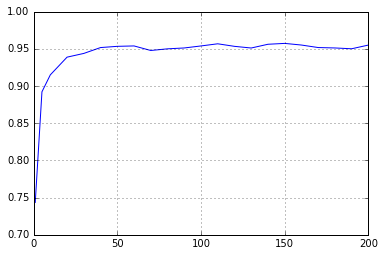

In [136]:
pylab.grid(True)
pylab.plot(n_estimators, n_accurasy)

In [142]:
%%time
max_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50, 55, 60]
n_accurasy = []

for i in max_features:
    estimator_3 = RandomForestClassifier(n_estimators=100, max_features=i)
    acc = cross_val_score(estimator_3, X, y, cv=10)
    n_accurasy.append(acc.mean())

Wall time: 2min 24s


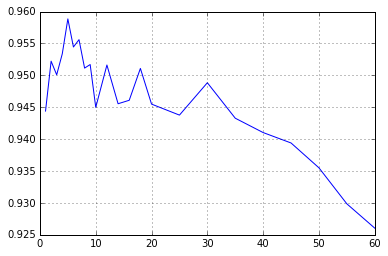

In [143]:
pylab.grid(True)
pylab.plot(max_features, n_accurasy)

In [144]:
%%time
max_depth = [1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
n_accurasy = []

for i in max_depth:
    estimator_3 = RandomForestClassifier(n_estimators=100, max_features=8, max_depth=i)
    acc = cross_val_score(estimator_3, X, y, cv=10)
    n_accurasy.append(acc.mean())

Wall time: 1min 30s


In [145]:
estimator = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=100, max_features=int(X.shape[1]**0.5))
acc = cross_val_score(estimator, X, y, cv=10)
ac = acc.mean()

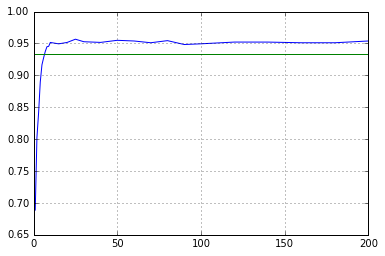

In [146]:
pylab.grid(True)
pylab.plot(max_depth, n_accurasy)
pylab.plot(max_depth, np.ones_like(max_depth)*ac)

In [147]:
%%time
max_depth = [1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11, 12, 13, 14, 15]
n_accurasy = []

for i in max_depth:
    estimator_3 = RandomForestClassifier(n_estimators=100, max_features=8, max_depth=i)
    acc = cross_val_score(estimator_3, X, y, cv=10)
    n_accurasy.append(acc.mean())

Wall time: 50.5 s


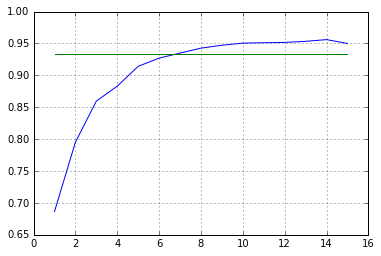

In [148]:
pylab.grid(True)
pylab.plot(max_depth, n_accurasy)
pylab.plot(max_depth, np.ones_like(max_depth)*ac)

In [149]:
write_answer([2, 3, 4, 7])